In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
df=pd.read_csv('data/Mall_customers.csv')

In [64]:
df = df.iloc[:, [3, 4]]

In [65]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [66]:
df = df.rename(columns={'Annual Income (k$)': 'income',
                       'Spending Score (1-100)':'spending_score'})

In [67]:
df

,income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


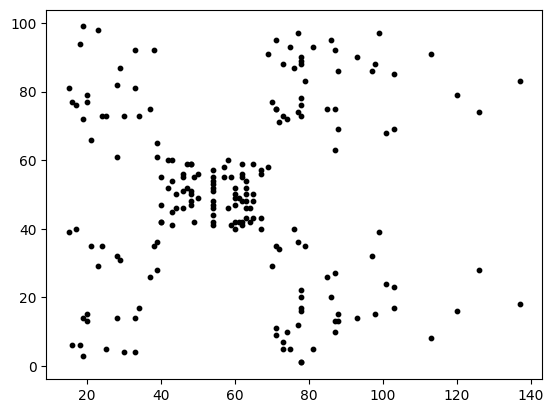

In [68]:
plt.scatter(df['income'], df['spending_score'], s=10, c='black')

In [69]:
from sklearn.cluster import KMeans

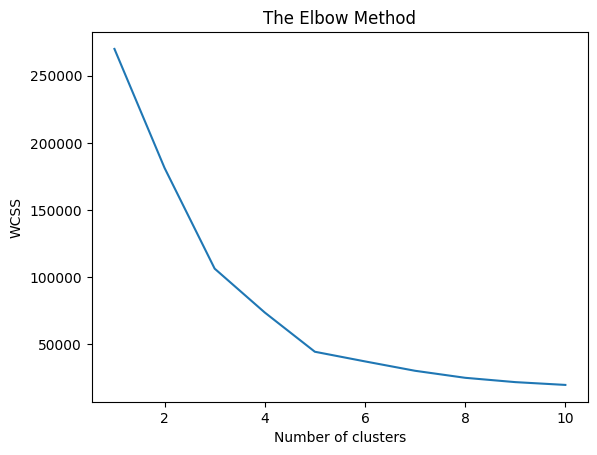

In [70]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,max_iter=300,n_init=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [71]:
from sklearn.cluster import DBSCAN

In [72]:
dbscan = DBSCAN(eps=5, min_samples=5)

In [73]:
labels = dbscan.fit_predict(df)

In [74]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

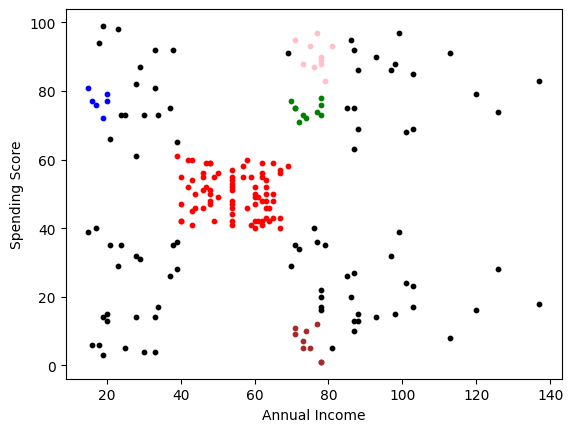

In [77]:
# Visualising the clusters
plt.scatter(df.loc[labels == -1, 'income'], df.loc[labels == -1, 'spending_score'], s=10, c='black') 

plt.scatter(df.loc[labels == 0, 'income'], df.loc[labels == 0, 'spending_score'], s=10, c='blue')
plt.scatter(df.loc[labels == 1, 'income'], df.loc[labels == 1, 'spending_score'], s=10, c='red')
plt.scatter(df.loc[labels == 2, 'income'], df.loc[labels == 2, 'spending_score'], s=10, c='green')
plt.scatter(df.loc[labels == 3, 'income'], df.loc[labels == 3, 'spending_score'], s=10, c='brown')
plt.scatter(df.loc[labels == 4, 'income'], df.loc[labels == 4, 'spending_score'], s=10, c='pink')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
